# Basics of TenserFlow

### Tenser & setup of network & Model

A tenser is a N-dimensional array:
* For example:
    * A scaler value of X = 23 --- is a Rank 0 Tenser
    * While a vector Y = [1.0,1.2,1.5,14] --- has a Rank of 1
    * And a Matrix of L = [[1.2,1.3],[2.0,2,1,2.4],[3,3.5,4,4.5,5]] --- has a Rank of 2
    * Similarly a Cube of numbers C3 = [[[2],[4],[5]],[[6],[8],[9]],[[12],[15],[16]]] --- has a Rank of 3
    

Tenser have different data types for cmputational efficiency like:
    * DT_FLOAT , tf.float32
    * DT_FLOAT , tf.float64
    * DT_INT , tf.int8
TenserFlow library will assing data type automatically, however declaring datatype is good practice as model will take optimum time trainingthen.

Tenserflow library uses computation using a dataflow graph i.e data format is in tensers and computation is guided by flow-graph.

> Any Tf program will have 2 discrete parts:
    +  Building a computaional graph ( operational steps arranged in graph of nodes)
    +  Running tensers on the computational graph (data is in tensers)
    

> Optimizer: Checks the magnitude of difference on the loss w.r.t each variable. 
    i.e. Optimizer will update the variable in he direction such that loss minimizes.

Examples of Optimizers -  Gradient Descent, Adam, AdaGrad etc.

### Types of Networks 

#### FeedForward Networks


    * Output at step t is independednt of output from step (t-1),(t-2) or (t+1).
    * For example a univariate timeseries whose value at a point is not dependent on previous or future values.

#### Convolutional Neural Network


* Not discussed here

#### Recurrent Neural Network

It is short for “Recurrent Neural Network”, and is basically a neural network that can be used when your data is treated as a sequence, where the particular order of the data-points matter. More importantly, this sequence can be of arbitrary length.
The most straight-forward example is perhaps a time-seriedems of numbers, where the task is to predict the next value given previous values. The input to the RNN at every time-step is the current value as well as a state vector which represent what the network has “seen” at time-steps before. This state-vector is the encoded memory of the RNN, initially set to zero.
Great paper on this https://arxiv.org/pdf/1506.00019.pdf

 > During Backpropogation there is possibility of Vanishing Gradient Problem.
 * i.e while calculating error at one point the weight and change in error ∆w both may be  <<<<1.
 > In such a scenario the gradient is lowered to the point of any reasonability , new weight ~ old weight.
 * Exploding gradient is exactly the opposite of this.

\begin{equation*}
(Error) =(Actual Output - Predicted Output)^2
\end{equation*} 

\begin{equation*}
\ ∆w = d(Error)/d(Weight) * Learning Rate\\
\ w = w + ∆w\\
\end{equation*} 

Exploding Gradient are handled well by:
    * Setting up a threshold value called Clip Gradient
    * Truncated BTT
    * Adjust the learning rate - RMSprop
Vanishng Gradient is handled by below measures:
    * ReLU activation function - (getting output 1 while calculating gradient)
    * RMSProp - clip the gradient again once it goes out of a threshold value
    * LSTM

#### Long Short Term Memory Network

Special type of RNN, capable of learning long-term dependencies.
How LSTM works in steps:
    + Step 1 - Decides what information is going to be thrown away from the cell state

\begin{equation*}
\ w_f = Weight\\
\ h(t-1) = Output From Previous Point\\
\ X_t = New Input\\
\ B_f = Bias\\
\ f_t = Forget Gate Layer
\end{equation*}

> Below is the equation for the Forget Gate i.e the information that has to be thrown away from the cell state.
> As a tan(h) function is used at the Sigmoid layer either the answer is 0 (Forget) & 1 (Keep)

\begin{align}
f_t = \sigma (w_f[h(t-1),X_t]+B_f)\\
\end{align}

How LSTM works in steps:
    + Step 2 - What information to keep which is decided in 2 parts itself
    * A sigmoid layer containing the input gate layer decides which values to be updated
    * A tanh layer contains vector of new candidate values that would be added to the state
    

\begin{equation*}
\ w_i = Weight\\
\ h(t-1) = Output From Previous Point\\
\ X_i = New Input\\
\ B_i = Bias\\
\ f_i = Forget Gate Layer
\end{equation*}

\begin{align}
i_t = \sigma (w_i[h(t-1),X_t]+B_i)\\
~c_t = \tanh (w_c[h(t-1),X_c]+B_c)\\
\end{align}

How LSTM works in steps:
    + Step 3 - Combining old cell state C(t-1) into new cell state Ct.
    * First we multiple old cell state C(t-1) by F_t.
    * Then add (i_t * ~c_t) to the new candidate values scaled by how much ever it was decided to update each value state.

\begin{align}
i_t = f_t * c(t-1) + (i_t * ~c_t)\\
\end{align}

How LSTM works in steps:
    + Step 4 - Last step, deciding what needs to be the output.
    * We push cell state through tanh ( push values to be between -1 and 1)
    * Multiply that by Sigmoid gate (to get revlevent outputs only)

\begin{align}
o_t = \sigma (w_o[h(t-1),X_t]+B_o)\\
~h_t = o_t * tanh(c_t)\\
\end{align}

## Running a simple Tf model on dummy data

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
print(tf.__version__, "-- tf",
      np.__version__,"-- np",
      keras.__version__, "-- keras")

/Users/Radhika/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.5.0 -- tf 1.14.1 -- np 2.0.8 -- keras


In [2]:
#Creating the dummy data
data = np.array([ i for i in range(100)], dtype = float)
target = np.array([ i for i in range(50)], dtype = float)

In [3]:
#Reshaping data to 3D
data = data.reshape((1, 1, 100)) 
target = target.reshape((1, 1, 50)) 
x_test=[i for i in range(100,200)]
x_test=np.array(x_test).reshape((1,1,100));
y_test=[i for i in range(101,151)]
y_test=np.array(y_test).reshape(1,1,50)

In [4]:
#Modelling with tf.format data
model = Sequential()  
model.add(LSTM(5, input_shape=(1, 100),return_sequences=True))
model.add(Dense(50))
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
model.fit(data, target, nb_epoch=5000, batch_size=1, verbose=2,validation_data=(x_test, y_test))


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/Users/Radhika/anaconda/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1 samples, validate on 1 samples
Epoch 1/5000
1s - loss: 24.4936 - acc: 0.0000e+00 - val_loss: 125.5290 - val_acc: 0.0000e+00
Epoch 2/5000
0s - loss: 24.4918 - acc: 0.0000e+00 - val_loss: 125.5273 - val_acc: 0.0000e+00
Epoch 3/5000
0s - loss: 24.4901 - acc: 0.0000e+00 - val_loss: 125.5256 - val_acc: 0.0000e+00
Epoch 4/5000
0s - loss: 24.4883 - acc: 0.0000e+00 - val_loss: 125.5240 - val_acc: 0.0000e+00
Epoch 5/5000
0s - loss: 24.4867 - acc: 0.0000e+00 - val_loss: 125.5223 - val_acc: 0.0000e+00
Epoch 6/5000
0s - loss: 24.4849 - acc: 0.0000e+00 - val_loss: 125.5206 - val_acc: 0.0000e+00
Epoch 7/5000
0s - loss: 24.4831 - acc: 0.0000e+00 - val_loss: 125.5189 - val_acc: 0.0000e+00
Epoch 8/5000
0s - loss: 24.4814 - acc: 0.0000e+00 - val_loss: 125.5172 - val_acc: 0.0000e+00
Epoch 9/5000
0s - loss: 24.4796 - acc: 0.0000e+00 - val_loss: 125.5155 - val_acc: 0.0000e+00
Epoch 10/5000
0s - loss: 24.4779 - acc: 0.0000e+00 - val_loss: 125.5138 - val_acc: 0.0000e+00
Epoch 11/5000
0s - loss: 24

0s - loss: 24.2786 - acc: 0.0000e+00 - val_loss: 125.3225 - val_acc: 0.0000e+00
Epoch 124/5000
0s - loss: 24.2768 - acc: 0.0000e+00 - val_loss: 125.3208 - val_acc: 0.0000e+00
Epoch 125/5000
0s - loss: 24.2750 - acc: 0.0000e+00 - val_loss: 125.3191 - val_acc: 0.0000e+00
Epoch 126/5000
0s - loss: 24.2733 - acc: 0.0000e+00 - val_loss: 125.3174 - val_acc: 0.0000e+00
Epoch 127/5000
0s - loss: 24.2715 - acc: 0.0000e+00 - val_loss: 125.3158 - val_acc: 0.0000e+00
Epoch 128/5000
0s - loss: 24.2697 - acc: 0.0000e+00 - val_loss: 125.3141 - val_acc: 0.0000e+00
Epoch 129/5000
0s - loss: 24.2680 - acc: 0.0000e+00 - val_loss: 125.3124 - val_acc: 0.0000e+00
Epoch 130/5000
0s - loss: 24.2662 - acc: 0.0000e+00 - val_loss: 125.3107 - val_acc: 0.0000e+00
Epoch 131/5000
0s - loss: 24.2645 - acc: 0.0000e+00 - val_loss: 125.3090 - val_acc: 0.0000e+00
Epoch 132/5000
0s - loss: 24.2627 - acc: 0.0000e+00 - val_loss: 125.3073 - val_acc: 0.0000e+00
Epoch 133/5000
0s - loss: 24.2609 - acc: 0.0000e+00 - val_loss: 1

0s - loss: 24.0813 - acc: 0.0000e+00 - val_loss: 125.1259 - val_acc: 0.0000e+00
Epoch 238/5000
0s - loss: 24.0796 - acc: 0.0000e+00 - val_loss: 125.1242 - val_acc: 0.0000e+00
Epoch 239/5000
0s - loss: 24.0778 - acc: 0.0000e+00 - val_loss: 125.1225 - val_acc: 0.0000e+00
Epoch 240/5000
0s - loss: 24.0761 - acc: 0.0000e+00 - val_loss: 125.1208 - val_acc: 0.0000e+00
Epoch 241/5000
0s - loss: 24.0744 - acc: 0.0000e+00 - val_loss: 125.1190 - val_acc: 0.0000e+00
Epoch 242/5000
0s - loss: 24.0726 - acc: 0.0000e+00 - val_loss: 125.1173 - val_acc: 0.0000e+00
Epoch 243/5000
0s - loss: 24.0709 - acc: 0.0000e+00 - val_loss: 125.1156 - val_acc: 0.0000e+00
Epoch 244/5000
0s - loss: 24.0692 - acc: 0.0000e+00 - val_loss: 125.1138 - val_acc: 0.0000e+00
Epoch 245/5000
0s - loss: 24.0675 - acc: 0.0000e+00 - val_loss: 125.1121 - val_acc: 0.0000e+00
Epoch 246/5000
0s - loss: 24.0657 - acc: 0.0000e+00 - val_loss: 125.1104 - val_acc: 0.0000e+00
Epoch 247/5000
0s - loss: 24.0640 - acc: 0.0000e+00 - val_loss: 1

0s - loss: 23.8654 - acc: 0.0000e+00 - val_loss: 124.9101 - val_acc: 0.0000e+00
Epoch 363/5000
0s - loss: 23.8637 - acc: 0.0000e+00 - val_loss: 124.9083 - val_acc: 0.0000e+00
Epoch 364/5000
0s - loss: 23.8620 - acc: 0.0000e+00 - val_loss: 124.9066 - val_acc: 0.0000e+00
Epoch 365/5000
0s - loss: 23.8602 - acc: 0.0000e+00 - val_loss: 124.9049 - val_acc: 0.0000e+00
Epoch 366/5000
0s - loss: 23.8585 - acc: 0.0000e+00 - val_loss: 124.9032 - val_acc: 0.0000e+00
Epoch 367/5000
0s - loss: 23.8568 - acc: 0.0000e+00 - val_loss: 124.9014 - val_acc: 0.0000e+00
Epoch 368/5000
0s - loss: 23.8551 - acc: 0.0000e+00 - val_loss: 124.8997 - val_acc: 0.0000e+00
Epoch 369/5000
0s - loss: 23.8533 - acc: 0.0000e+00 - val_loss: 124.8980 - val_acc: 0.0000e+00
Epoch 370/5000
0s - loss: 23.8516 - acc: 0.0000e+00 - val_loss: 124.8962 - val_acc: 0.0000e+00
Epoch 371/5000
0s - loss: 23.8499 - acc: 0.0000e+00 - val_loss: 124.8945 - val_acc: 0.0000e+00
Epoch 372/5000
0s - loss: 23.8482 - acc: 0.0000e+00 - val_loss: 1

0s - loss: 23.6582 - acc: 0.0000e+00 - val_loss: 124.7029 - val_acc: 0.0000e+00
Epoch 483/5000
0s - loss: 23.6565 - acc: 0.0000e+00 - val_loss: 124.7011 - val_acc: 0.0000e+00
Epoch 484/5000
0s - loss: 23.6548 - acc: 0.0000e+00 - val_loss: 124.6994 - val_acc: 0.0000e+00
Epoch 485/5000
0s - loss: 23.6530 - acc: 0.0000e+00 - val_loss: 124.6977 - val_acc: 0.0000e+00
Epoch 486/5000
0s - loss: 23.6513 - acc: 0.0000e+00 - val_loss: 124.6960 - val_acc: 0.0000e+00
Epoch 487/5000
0s - loss: 23.6496 - acc: 0.0000e+00 - val_loss: 124.6942 - val_acc: 0.0000e+00
Epoch 488/5000
0s - loss: 23.6479 - acc: 0.0000e+00 - val_loss: 124.6925 - val_acc: 0.0000e+00
Epoch 489/5000
0s - loss: 23.6461 - acc: 0.0000e+00 - val_loss: 124.6908 - val_acc: 0.0000e+00
Epoch 490/5000
0s - loss: 23.6444 - acc: 0.0000e+00 - val_loss: 124.6890 - val_acc: 0.0000e+00
Epoch 491/5000
0s - loss: 23.6427 - acc: 0.0000e+00 - val_loss: 124.6873 - val_acc: 0.0000e+00
Epoch 492/5000
0s - loss: 23.6409 - acc: 0.0000e+00 - val_loss: 1

0s - loss: 23.4406 - acc: 0.0000e+00 - val_loss: 124.4853 - val_acc: 0.0000e+00
Epoch 609/5000
0s - loss: 23.4389 - acc: 0.0000e+00 - val_loss: 124.4836 - val_acc: 0.0000e+00
Epoch 610/5000
0s - loss: 23.4372 - acc: 0.0000e+00 - val_loss: 124.4818 - val_acc: 0.0000e+00
Epoch 611/5000
0s - loss: 23.4355 - acc: 0.0000e+00 - val_loss: 124.4801 - val_acc: 0.0000e+00
Epoch 612/5000
0s - loss: 23.4337 - acc: 0.0000e+00 - val_loss: 124.4784 - val_acc: 0.0000e+00
Epoch 613/5000
0s - loss: 23.4320 - acc: 0.0000e+00 - val_loss: 124.4767 - val_acc: 0.0000e+00
Epoch 614/5000
0s - loss: 23.4303 - acc: 0.0000e+00 - val_loss: 124.4750 - val_acc: 0.0000e+00
Epoch 615/5000
0s - loss: 23.4286 - acc: 0.0000e+00 - val_loss: 124.4732 - val_acc: 0.0000e+00
Epoch 616/5000
0s - loss: 23.4268 - acc: 0.0000e+00 - val_loss: 124.4715 - val_acc: 0.0000e+00
Epoch 617/5000
0s - loss: 23.4251 - acc: 0.0000e+00 - val_loss: 124.4698 - val_acc: 0.0000e+00
Epoch 618/5000
0s - loss: 23.4234 - acc: 0.0000e+00 - val_loss: 1

0s - loss: 23.2918 - acc: 0.0000e+00 - val_loss: 124.3365 - val_acc: 0.0000e+00
Epoch 696/5000
0s - loss: 23.2901 - acc: 0.0000e+00 - val_loss: 124.3348 - val_acc: 0.0000e+00
Epoch 697/5000
0s - loss: 23.2884 - acc: 0.0000e+00 - val_loss: 124.3331 - val_acc: 0.0000e+00
Epoch 698/5000
0s - loss: 23.2867 - acc: 0.0000e+00 - val_loss: 124.3313 - val_acc: 0.0000e+00
Epoch 699/5000
0s - loss: 23.2850 - acc: 0.0000e+00 - val_loss: 124.3297 - val_acc: 0.0000e+00
Epoch 700/5000
0s - loss: 23.2833 - acc: 0.0000e+00 - val_loss: 124.3280 - val_acc: 0.0000e+00
Epoch 701/5000
0s - loss: 23.2816 - acc: 0.0000e+00 - val_loss: 124.3263 - val_acc: 0.0000e+00
Epoch 702/5000
0s - loss: 23.2799 - acc: 0.0000e+00 - val_loss: 124.3246 - val_acc: 0.0000e+00
Epoch 703/5000
0s - loss: 23.2782 - acc: 0.0000e+00 - val_loss: 124.3229 - val_acc: 0.0000e+00
Epoch 704/5000
0s - loss: 23.2765 - acc: 0.0000e+00 - val_loss: 124.3212 - val_acc: 0.0000e+00
Epoch 705/5000
0s - loss: 23.2748 - acc: 0.0000e+00 - val_loss: 1

0s - loss: 23.0871 - acc: 0.0000e+00 - val_loss: 124.1318 - val_acc: 0.0000e+00
Epoch 817/5000
0s - loss: 23.0854 - acc: 0.0000e+00 - val_loss: 124.1301 - val_acc: 0.0000e+00
Epoch 818/5000
0s - loss: 23.0837 - acc: 0.0000e+00 - val_loss: 124.1284 - val_acc: 0.0000e+00
Epoch 819/5000
0s - loss: 23.0820 - acc: 0.0000e+00 - val_loss: 124.1267 - val_acc: 0.0000e+00
Epoch 820/5000
0s - loss: 23.0803 - acc: 0.0000e+00 - val_loss: 124.1250 - val_acc: 0.0000e+00
Epoch 821/5000
0s - loss: 23.0786 - acc: 0.0000e+00 - val_loss: 124.1234 - val_acc: 0.0000e+00
Epoch 822/5000
0s - loss: 23.0770 - acc: 0.0000e+00 - val_loss: 124.1217 - val_acc: 0.0000e+00
Epoch 823/5000
0s - loss: 23.0753 - acc: 0.0000e+00 - val_loss: 124.1200 - val_acc: 0.0000e+00
Epoch 824/5000
0s - loss: 23.0736 - acc: 0.0000e+00 - val_loss: 124.1183 - val_acc: 0.0000e+00
Epoch 825/5000
0s - loss: 23.0719 - acc: 0.0000e+00 - val_loss: 124.1166 - val_acc: 0.0000e+00
Epoch 826/5000
0s - loss: 23.0702 - acc: 0.0000e+00 - val_loss: 1

0s - loss: 22.8757 - acc: 0.0000e+00 - val_loss: 123.9204 - val_acc: 0.0000e+00
Epoch 942/5000
0s - loss: 22.8740 - acc: 0.0000e+00 - val_loss: 123.9187 - val_acc: 0.0000e+00
Epoch 943/5000
0s - loss: 22.8723 - acc: 0.0000e+00 - val_loss: 123.9170 - val_acc: 0.0000e+00
Epoch 944/5000
0s - loss: 22.8706 - acc: 0.0000e+00 - val_loss: 123.9153 - val_acc: 0.0000e+00
Epoch 945/5000
0s - loss: 22.8689 - acc: 0.0000e+00 - val_loss: 123.9136 - val_acc: 0.0000e+00
Epoch 946/5000
0s - loss: 22.8672 - acc: 0.0000e+00 - val_loss: 123.9119 - val_acc: 0.0000e+00
Epoch 947/5000
0s - loss: 22.8656 - acc: 0.0000e+00 - val_loss: 123.9103 - val_acc: 0.0000e+00
Epoch 948/5000
0s - loss: 22.8639 - acc: 0.0000e+00 - val_loss: 123.9086 - val_acc: 0.0000e+00
Epoch 949/5000
0s - loss: 22.8622 - acc: 0.0000e+00 - val_loss: 123.9069 - val_acc: 0.0000e+00
Epoch 950/5000
0s - loss: 22.8605 - acc: 0.0000e+00 - val_loss: 123.9052 - val_acc: 0.0000e+00
Epoch 951/5000
0s - loss: 22.8588 - acc: 0.0000e+00 - val_loss: 1

0s - loss: 22.6609 - acc: 0.0000e+00 - val_loss: 123.7056 - val_acc: 0.0000e+00
Epoch 1069/5000
0s - loss: 22.6592 - acc: 0.0000e+00 - val_loss: 123.7039 - val_acc: 0.0000e+00
Epoch 1070/5000
0s - loss: 22.6575 - acc: 0.0000e+00 - val_loss: 123.7022 - val_acc: 0.0000e+00
Epoch 1071/5000
0s - loss: 22.6558 - acc: 0.0000e+00 - val_loss: 123.7005 - val_acc: 0.0000e+00
Epoch 1072/5000
0s - loss: 22.6541 - acc: 0.0000e+00 - val_loss: 123.6988 - val_acc: 0.0000e+00
Epoch 1073/5000
0s - loss: 22.6525 - acc: 0.0000e+00 - val_loss: 123.6971 - val_acc: 0.0000e+00
Epoch 1074/5000
0s - loss: 22.6508 - acc: 0.0000e+00 - val_loss: 123.6955 - val_acc: 0.0000e+00
Epoch 1075/5000
0s - loss: 22.6491 - acc: 0.0000e+00 - val_loss: 123.6938 - val_acc: 0.0000e+00
Epoch 1076/5000
0s - loss: 22.6474 - acc: 0.0000e+00 - val_loss: 123.6921 - val_acc: 0.0000e+00
Epoch 1077/5000
0s - loss: 22.6457 - acc: 0.0000e+00 - val_loss: 123.6904 - val_acc: 0.0000e+00
Epoch 1078/5000
0s - loss: 22.6440 - acc: 0.0000e+00 - v

Epoch 1154/5000
0s - loss: 22.5155 - acc: 0.0000e+00 - val_loss: 123.5602 - val_acc: 0.0000e+00
Epoch 1155/5000
0s - loss: 22.5138 - acc: 0.0000e+00 - val_loss: 123.5585 - val_acc: 0.0000e+00
Epoch 1156/5000
0s - loss: 22.5121 - acc: 0.0000e+00 - val_loss: 123.5568 - val_acc: 0.0000e+00
Epoch 1157/5000
0s - loss: 22.5104 - acc: 0.0000e+00 - val_loss: 123.5551 - val_acc: 0.0000e+00
Epoch 1158/5000
0s - loss: 22.5087 - acc: 0.0000e+00 - val_loss: 123.5534 - val_acc: 0.0000e+00
Epoch 1159/5000
0s - loss: 22.5070 - acc: 0.0000e+00 - val_loss: 123.5517 - val_acc: 0.0000e+00
Epoch 1160/5000
0s - loss: 22.5053 - acc: 0.0000e+00 - val_loss: 123.5500 - val_acc: 0.0000e+00
Epoch 1161/5000
0s - loss: 22.5036 - acc: 0.0000e+00 - val_loss: 123.5483 - val_acc: 0.0000e+00
Epoch 1162/5000
0s - loss: 22.5019 - acc: 0.0000e+00 - val_loss: 123.5466 - val_acc: 0.0000e+00
Epoch 1163/5000
0s - loss: 22.5002 - acc: 0.0000e+00 - val_loss: 123.5449 - val_acc: 0.0000e+00
Epoch 1164/5000
0s - loss: 22.4986 - acc

0s - loss: 22.3061 - acc: 0.0000e+00 - val_loss: 123.3508 - val_acc: 0.0000e+00
Epoch 1281/5000
0s - loss: 22.3044 - acc: 0.0000e+00 - val_loss: 123.3491 - val_acc: 0.0000e+00
Epoch 1282/5000
0s - loss: 22.3027 - acc: 0.0000e+00 - val_loss: 123.3475 - val_acc: 0.0000e+00
Epoch 1283/5000
0s - loss: 22.3011 - acc: 0.0000e+00 - val_loss: 123.3458 - val_acc: 0.0000e+00
Epoch 1284/5000
0s - loss: 22.2994 - acc: 0.0000e+00 - val_loss: 123.3442 - val_acc: 0.0000e+00
Epoch 1285/5000
0s - loss: 22.2978 - acc: 0.0000e+00 - val_loss: 123.3425 - val_acc: 0.0000e+00
Epoch 1286/5000
0s - loss: 22.2961 - acc: 0.0000e+00 - val_loss: 123.3408 - val_acc: 0.0000e+00
Epoch 1287/5000
0s - loss: 22.2945 - acc: 0.0000e+00 - val_loss: 123.3392 - val_acc: 0.0000e+00
Epoch 1288/5000
0s - loss: 22.2928 - acc: 0.0000e+00 - val_loss: 123.3375 - val_acc: 0.0000e+00
Epoch 1289/5000
0s - loss: 22.2912 - acc: 0.0000e+00 - val_loss: 123.3359 - val_acc: 0.0000e+00
Epoch 1290/5000
0s - loss: 22.2895 - acc: 0.0000e+00 - v

0s - loss: 22.0974 - acc: 0.0000e+00 - val_loss: 123.1421 - val_acc: 0.0000e+00
Epoch 1407/5000
0s - loss: 22.0957 - acc: 0.0000e+00 - val_loss: 123.1404 - val_acc: 0.0000e+00
Epoch 1408/5000
0s - loss: 22.0941 - acc: 0.0000e+00 - val_loss: 123.1388 - val_acc: 0.0000e+00
Epoch 1409/5000
0s - loss: 22.0924 - acc: 0.0000e+00 - val_loss: 123.1372 - val_acc: 0.0000e+00
Epoch 1410/5000
0s - loss: 22.0908 - acc: 0.0000e+00 - val_loss: 123.1355 - val_acc: 0.0000e+00
Epoch 1411/5000
0s - loss: 22.0891 - acc: 0.0000e+00 - val_loss: 123.1339 - val_acc: 0.0000e+00
Epoch 1412/5000
0s - loss: 22.0875 - acc: 0.0000e+00 - val_loss: 123.1322 - val_acc: 0.0000e+00
Epoch 1413/5000
0s - loss: 22.0858 - acc: 0.0000e+00 - val_loss: 123.1305 - val_acc: 0.0000e+00
Epoch 1414/5000
0s - loss: 22.0841 - acc: 0.0000e+00 - val_loss: 123.1289 - val_acc: 0.0000e+00
Epoch 1415/5000
0s - loss: 22.0825 - acc: 0.0000e+00 - val_loss: 123.1272 - val_acc: 0.0000e+00
Epoch 1416/5000
0s - loss: 22.0808 - acc: 0.0000e+00 - v

Epoch 1534/5000
0s - loss: 21.8854 - acc: 0.0000e+00 - val_loss: 122.9301 - val_acc: 0.0000e+00
Epoch 1535/5000
0s - loss: 21.8838 - acc: 0.0000e+00 - val_loss: 122.9285 - val_acc: 0.0000e+00
Epoch 1536/5000
0s - loss: 21.8821 - acc: 0.0000e+00 - val_loss: 122.9268 - val_acc: 0.0000e+00
Epoch 1537/5000
0s - loss: 21.8805 - acc: 0.0000e+00 - val_loss: 122.9252 - val_acc: 0.0000e+00
Epoch 1538/5000
0s - loss: 21.8788 - acc: 0.0000e+00 - val_loss: 122.9235 - val_acc: 0.0000e+00
Epoch 1539/5000
0s - loss: 21.8771 - acc: 0.0000e+00 - val_loss: 122.9219 - val_acc: 0.0000e+00
Epoch 1540/5000
0s - loss: 21.8755 - acc: 0.0000e+00 - val_loss: 122.9202 - val_acc: 0.0000e+00
Epoch 1541/5000
0s - loss: 21.8738 - acc: 0.0000e+00 - val_loss: 122.9186 - val_acc: 0.0000e+00
Epoch 1542/5000
0s - loss: 21.8722 - acc: 0.0000e+00 - val_loss: 122.9169 - val_acc: 0.0000e+00
Epoch 1543/5000
0s - loss: 21.8705 - acc: 0.0000e+00 - val_loss: 122.9152 - val_acc: 0.0000e+00
Epoch 1544/5000
0s - loss: 21.8689 - acc

Epoch 1621/5000
0s - loss: 21.7424 - acc: 0.0000e+00 - val_loss: 122.7871 - val_acc: 0.0000e+00
Epoch 1622/5000
0s - loss: 21.7408 - acc: 0.0000e+00 - val_loss: 122.7855 - val_acc: 0.0000e+00
Epoch 1623/5000
0s - loss: 21.7392 - acc: 0.0000e+00 - val_loss: 122.7839 - val_acc: 0.0000e+00
Epoch 1624/5000
0s - loss: 21.7375 - acc: 0.0000e+00 - val_loss: 122.7822 - val_acc: 0.0000e+00
Epoch 1625/5000
0s - loss: 21.7359 - acc: 0.0000e+00 - val_loss: 122.7806 - val_acc: 0.0000e+00
Epoch 1626/5000
0s - loss: 21.7343 - acc: 0.0000e+00 - val_loss: 122.7790 - val_acc: 0.0000e+00
Epoch 1627/5000
0s - loss: 21.7327 - acc: 0.0000e+00 - val_loss: 122.7774 - val_acc: 0.0000e+00
Epoch 1628/5000
0s - loss: 21.7310 - acc: 0.0000e+00 - val_loss: 122.7758 - val_acc: 0.0000e+00
Epoch 1629/5000
0s - loss: 21.7294 - acc: 0.0000e+00 - val_loss: 122.7742 - val_acc: 0.0000e+00
Epoch 1630/5000
0s - loss: 21.7278 - acc: 0.0000e+00 - val_loss: 122.7726 - val_acc: 0.0000e+00
Epoch 1631/5000
0s - loss: 21.7262 - acc

0s - loss: 21.5446 - acc: 0.0000e+00 - val_loss: 122.5894 - val_acc: 0.0000e+00
Epoch 1744/5000
0s - loss: 21.5430 - acc: 0.0000e+00 - val_loss: 122.5878 - val_acc: 0.0000e+00
Epoch 1745/5000
0s - loss: 21.5414 - acc: 0.0000e+00 - val_loss: 122.5862 - val_acc: 0.0000e+00
Epoch 1746/5000
0s - loss: 21.5398 - acc: 0.0000e+00 - val_loss: 122.5845 - val_acc: 0.0000e+00
Epoch 1747/5000
0s - loss: 21.5382 - acc: 0.0000e+00 - val_loss: 122.5829 - val_acc: 0.0000e+00
Epoch 1748/5000
0s - loss: 21.5365 - acc: 0.0000e+00 - val_loss: 122.5813 - val_acc: 0.0000e+00
Epoch 1749/5000
0s - loss: 21.5349 - acc: 0.0000e+00 - val_loss: 122.5797 - val_acc: 0.0000e+00
Epoch 1750/5000
0s - loss: 21.5333 - acc: 0.0000e+00 - val_loss: 122.5780 - val_acc: 0.0000e+00
Epoch 1751/5000
0s - loss: 21.5317 - acc: 0.0000e+00 - val_loss: 122.5764 - val_acc: 0.0000e+00
Epoch 1752/5000
0s - loss: 21.5300 - acc: 0.0000e+00 - val_loss: 122.5748 - val_acc: 0.0000e+00
Epoch 1753/5000
0s - loss: 21.5284 - acc: 0.0000e+00 - v

0s - loss: 21.3988 - acc: 0.0000e+00 - val_loss: 122.4435 - val_acc: 0.0000e+00
Epoch 1834/5000
0s - loss: 21.3972 - acc: 0.0000e+00 - val_loss: 122.4419 - val_acc: 0.0000e+00
Epoch 1835/5000
0s - loss: 21.3955 - acc: 0.0000e+00 - val_loss: 122.4403 - val_acc: 0.0000e+00
Epoch 1836/5000
0s - loss: 21.3939 - acc: 0.0000e+00 - val_loss: 122.4387 - val_acc: 0.0000e+00
Epoch 1837/5000
0s - loss: 21.3923 - acc: 0.0000e+00 - val_loss: 122.4370 - val_acc: 0.0000e+00
Epoch 1838/5000
0s - loss: 21.3907 - acc: 0.0000e+00 - val_loss: 122.4354 - val_acc: 0.0000e+00
Epoch 1839/5000
0s - loss: 21.3890 - acc: 0.0000e+00 - val_loss: 122.4338 - val_acc: 0.0000e+00
Epoch 1840/5000
0s - loss: 21.3874 - acc: 0.0000e+00 - val_loss: 122.4322 - val_acc: 0.0000e+00
Epoch 1841/5000
0s - loss: 21.3858 - acc: 0.0000e+00 - val_loss: 122.4306 - val_acc: 0.0000e+00
Epoch 1842/5000
0s - loss: 21.3842 - acc: 0.0000e+00 - val_loss: 122.4289 - val_acc: 0.0000e+00
Epoch 1843/5000
0s - loss: 21.3826 - acc: 0.0000e+00 - v

0s - loss: 21.2254 - acc: 0.0000e+00 - val_loss: 122.2701 - val_acc: 0.0000e+00
Epoch 1941/5000
0s - loss: 21.2237 - acc: 0.0000e+00 - val_loss: 122.2685 - val_acc: 0.0000e+00
Epoch 1942/5000
0s - loss: 21.2221 - acc: 0.0000e+00 - val_loss: 122.2669 - val_acc: 0.0000e+00
Epoch 1943/5000
0s - loss: 21.2205 - acc: 0.0000e+00 - val_loss: 122.2653 - val_acc: 0.0000e+00
Epoch 1944/5000
0s - loss: 21.2189 - acc: 0.0000e+00 - val_loss: 122.2636 - val_acc: 0.0000e+00
Epoch 1945/5000
0s - loss: 21.2172 - acc: 0.0000e+00 - val_loss: 122.2620 - val_acc: 0.0000e+00
Epoch 1946/5000
0s - loss: 21.2156 - acc: 0.0000e+00 - val_loss: 122.2604 - val_acc: 0.0000e+00
Epoch 1947/5000
0s - loss: 21.2140 - acc: 0.0000e+00 - val_loss: 122.2588 - val_acc: 0.0000e+00
Epoch 1948/5000
0s - loss: 21.2124 - acc: 0.0000e+00 - val_loss: 122.2571 - val_acc: 0.0000e+00
Epoch 1949/5000
0s - loss: 21.2108 - acc: 0.0000e+00 - val_loss: 122.2555 - val_acc: 0.0000e+00
Epoch 1950/5000
0s - loss: 21.2092 - acc: 0.0000e+00 - v

0s - loss: 21.0195 - acc: 0.0000e+00 - val_loss: 122.0643 - val_acc: 0.0000e+00
Epoch 2068/5000
0s - loss: 21.0179 - acc: 0.0000e+00 - val_loss: 122.0627 - val_acc: 0.0000e+00
Epoch 2069/5000
0s - loss: 21.0163 - acc: 0.0000e+00 - val_loss: 122.0610 - val_acc: 0.0000e+00
Epoch 2070/5000
0s - loss: 21.0147 - acc: 0.0000e+00 - val_loss: 122.0594 - val_acc: 0.0000e+00
Epoch 2071/5000
0s - loss: 21.0131 - acc: 0.0000e+00 - val_loss: 122.0578 - val_acc: 0.0000e+00
Epoch 2072/5000
0s - loss: 21.0114 - acc: 0.0000e+00 - val_loss: 122.0562 - val_acc: 0.0000e+00
Epoch 2073/5000
0s - loss: 21.0098 - acc: 0.0000e+00 - val_loss: 122.0546 - val_acc: 0.0000e+00
Epoch 2074/5000
0s - loss: 21.0082 - acc: 0.0000e+00 - val_loss: 122.0529 - val_acc: 0.0000e+00
Epoch 2075/5000
0s - loss: 21.0066 - acc: 0.0000e+00 - val_loss: 122.0513 - val_acc: 0.0000e+00
Epoch 2076/5000
0s - loss: 21.0049 - acc: 0.0000e+00 - val_loss: 122.0497 - val_acc: 0.0000e+00
Epoch 2077/5000
0s - loss: 21.0033 - acc: 0.0000e+00 - v

0s - loss: 20.8283 - acc: 0.0000e+00 - val_loss: 121.8730 - val_acc: 0.0000e+00
Epoch 2186/5000
0s - loss: 20.8267 - acc: 0.0000e+00 - val_loss: 121.8714 - val_acc: 0.0000e+00
Epoch 2187/5000
0s - loss: 20.8251 - acc: 0.0000e+00 - val_loss: 121.8698 - val_acc: 0.0000e+00
Epoch 2188/5000
0s - loss: 20.8234 - acc: 0.0000e+00 - val_loss: 121.8682 - val_acc: 0.0000e+00
Epoch 2189/5000
0s - loss: 20.8218 - acc: 0.0000e+00 - val_loss: 121.8666 - val_acc: 0.0000e+00
Epoch 2190/5000
0s - loss: 20.8202 - acc: 0.0000e+00 - val_loss: 121.8650 - val_acc: 0.0000e+00
Epoch 2191/5000
0s - loss: 20.8186 - acc: 0.0000e+00 - val_loss: 121.8633 - val_acc: 0.0000e+00
Epoch 2192/5000
0s - loss: 20.8169 - acc: 0.0000e+00 - val_loss: 121.8617 - val_acc: 0.0000e+00
Epoch 2193/5000
0s - loss: 20.8153 - acc: 0.0000e+00 - val_loss: 121.8601 - val_acc: 0.0000e+00
Epoch 2194/5000
0s - loss: 20.8137 - acc: 0.0000e+00 - val_loss: 121.8585 - val_acc: 0.0000e+00
Epoch 2195/5000
0s - loss: 20.8121 - acc: 0.0000e+00 - v

0s - loss: 20.6897 - acc: 0.0000e+00 - val_loss: 121.7345 - val_acc: 0.0000e+00
Epoch 2272/5000
0s - loss: 20.6881 - acc: 0.0000e+00 - val_loss: 121.7329 - val_acc: 0.0000e+00
Epoch 2273/5000
0s - loss: 20.6866 - acc: 0.0000e+00 - val_loss: 121.7313 - val_acc: 0.0000e+00
Epoch 2274/5000
0s - loss: 20.6850 - acc: 0.0000e+00 - val_loss: 121.7297 - val_acc: 0.0000e+00
Epoch 2275/5000
0s - loss: 20.6834 - acc: 0.0000e+00 - val_loss: 121.7282 - val_acc: 0.0000e+00
Epoch 2276/5000
0s - loss: 20.6818 - acc: 0.0000e+00 - val_loss: 121.7265 - val_acc: 0.0000e+00
Epoch 2277/5000
0s - loss: 20.6802 - acc: 0.0000e+00 - val_loss: 121.7249 - val_acc: 0.0000e+00
Epoch 2278/5000
0s - loss: 20.6786 - acc: 0.0000e+00 - val_loss: 121.7233 - val_acc: 0.0000e+00
Epoch 2279/5000
0s - loss: 20.6770 - acc: 0.0000e+00 - val_loss: 121.7218 - val_acc: 0.0000e+00
Epoch 2280/5000
0s - loss: 20.6754 - acc: 0.0000e+00 - val_loss: 121.7202 - val_acc: 0.0000e+00
Epoch 2281/5000
0s - loss: 20.6739 - acc: 0.0000e+00 - v

0s - loss: 20.5533 - acc: 0.0000e+00 - val_loss: 121.5981 - val_acc: 0.0000e+00
Epoch 2358/5000
0s - loss: 20.5518 - acc: 0.0000e+00 - val_loss: 121.5965 - val_acc: 0.0000e+00
Epoch 2359/5000
0s - loss: 20.5502 - acc: 0.0000e+00 - val_loss: 121.5950 - val_acc: 0.0000e+00
Epoch 2360/5000
0s - loss: 20.5486 - acc: 0.0000e+00 - val_loss: 121.5934 - val_acc: 0.0000e+00
Epoch 2361/5000
0s - loss: 20.5470 - acc: 0.0000e+00 - val_loss: 121.5918 - val_acc: 0.0000e+00
Epoch 2362/5000
0s - loss: 20.5454 - acc: 0.0000e+00 - val_loss: 121.5902 - val_acc: 0.0000e+00
Epoch 2363/5000
0s - loss: 20.5438 - acc: 0.0000e+00 - val_loss: 121.5886 - val_acc: 0.0000e+00
Epoch 2364/5000
0s - loss: 20.5422 - acc: 0.0000e+00 - val_loss: 121.5870 - val_acc: 0.0000e+00
Epoch 2365/5000
0s - loss: 20.5407 - acc: 0.0000e+00 - val_loss: 121.5854 - val_acc: 0.0000e+00
Epoch 2366/5000
0s - loss: 20.5391 - acc: 0.0000e+00 - val_loss: 121.5838 - val_acc: 0.0000e+00
Epoch 2367/5000
0s - loss: 20.5375 - acc: 0.0000e+00 - v

0s - loss: 20.4170 - acc: 0.0000e+00 - val_loss: 121.4618 - val_acc: 0.0000e+00
Epoch 2444/5000
0s - loss: 20.4154 - acc: 0.0000e+00 - val_loss: 121.4602 - val_acc: 0.0000e+00
Epoch 2445/5000
0s - loss: 20.4138 - acc: 0.0000e+00 - val_loss: 121.4586 - val_acc: 0.0000e+00
Epoch 2446/5000
0s - loss: 20.4122 - acc: 0.0000e+00 - val_loss: 121.4570 - val_acc: 0.0000e+00
Epoch 2447/5000
0s - loss: 20.4107 - acc: 0.0000e+00 - val_loss: 121.4555 - val_acc: 0.0000e+00
Epoch 2448/5000
0s - loss: 20.4091 - acc: 0.0000e+00 - val_loss: 121.4539 - val_acc: 0.0000e+00
Epoch 2449/5000
0s - loss: 20.4075 - acc: 0.0000e+00 - val_loss: 121.4523 - val_acc: 0.0000e+00
Epoch 2450/5000
0s - loss: 20.4059 - acc: 0.0000e+00 - val_loss: 121.4507 - val_acc: 0.0000e+00
Epoch 2451/5000
0s - loss: 20.4043 - acc: 0.0000e+00 - val_loss: 121.4491 - val_acc: 0.0000e+00
Epoch 2452/5000
0s - loss: 20.4027 - acc: 0.0000e+00 - val_loss: 121.4475 - val_acc: 0.0000e+00
Epoch 2453/5000
0s - loss: 20.4012 - acc: 0.0000e+00 - v

0s - loss: 20.2807 - acc: 0.0000e+00 - val_loss: 121.3254 - val_acc: 0.0000e+00
Epoch 2530/5000
0s - loss: 20.2791 - acc: 0.0000e+00 - val_loss: 121.3239 - val_acc: 0.0000e+00
Epoch 2531/5000
0s - loss: 20.2775 - acc: 0.0000e+00 - val_loss: 121.3223 - val_acc: 0.0000e+00
Epoch 2532/5000
0s - loss: 20.2759 - acc: 0.0000e+00 - val_loss: 121.3207 - val_acc: 0.0000e+00
Epoch 2533/5000
0s - loss: 20.2743 - acc: 0.0000e+00 - val_loss: 121.3191 - val_acc: 0.0000e+00
Epoch 2534/5000
0s - loss: 20.2727 - acc: 0.0000e+00 - val_loss: 121.3175 - val_acc: 0.0000e+00
Epoch 2535/5000
0s - loss: 20.2711 - acc: 0.0000e+00 - val_loss: 121.3159 - val_acc: 0.0000e+00
Epoch 2536/5000
0s - loss: 20.2696 - acc: 0.0000e+00 - val_loss: 121.3143 - val_acc: 0.0000e+00
Epoch 2537/5000
0s - loss: 20.2680 - acc: 0.0000e+00 - val_loss: 121.3128 - val_acc: 0.0000e+00
Epoch 2538/5000
0s - loss: 20.2664 - acc: 0.0000e+00 - val_loss: 121.3112 - val_acc: 0.0000e+00
Epoch 2539/5000
0s - loss: 20.2648 - acc: 0.0000e+00 - v

Epoch 2615/5000
0s - loss: 20.1443 - acc: 0.0000e+00 - val_loss: 121.1891 - val_acc: 0.0000e+00
Epoch 2616/5000
0s - loss: 20.1427 - acc: 0.0000e+00 - val_loss: 121.1875 - val_acc: 0.0000e+00
Epoch 2617/5000
0s - loss: 20.1412 - acc: 0.0000e+00 - val_loss: 121.1859 - val_acc: 0.0000e+00
Epoch 2618/5000
0s - loss: 20.1396 - acc: 0.0000e+00 - val_loss: 121.1844 - val_acc: 0.0000e+00
Epoch 2619/5000
0s - loss: 20.1380 - acc: 0.0000e+00 - val_loss: 121.1828 - val_acc: 0.0000e+00
Epoch 2620/5000
0s - loss: 20.1364 - acc: 0.0000e+00 - val_loss: 121.1812 - val_acc: 0.0000e+00
Epoch 2621/5000
0s - loss: 20.1348 - acc: 0.0000e+00 - val_loss: 121.1796 - val_acc: 0.0000e+00
Epoch 2622/5000
0s - loss: 20.1332 - acc: 0.0000e+00 - val_loss: 121.1780 - val_acc: 0.0000e+00
Epoch 2623/5000
0s - loss: 20.1316 - acc: 0.0000e+00 - val_loss: 121.1764 - val_acc: 0.0000e+00
Epoch 2624/5000
0s - loss: 20.1301 - acc: 0.0000e+00 - val_loss: 121.1748 - val_acc: 0.0000e+00
Epoch 2625/5000
0s - loss: 20.1285 - acc

Epoch 2702/5000
0s - loss: 20.0064 - acc: 0.0000e+00 - val_loss: 121.0512 - val_acc: 0.0000e+00
Epoch 2703/5000
0s - loss: 20.0048 - acc: 0.0000e+00 - val_loss: 121.0496 - val_acc: 0.0000e+00
Epoch 2704/5000
0s - loss: 20.0032 - acc: 0.0000e+00 - val_loss: 121.0480 - val_acc: 0.0000e+00
Epoch 2705/5000
0s - loss: 20.0016 - acc: 0.0000e+00 - val_loss: 121.0464 - val_acc: 0.0000e+00
Epoch 2706/5000
0s - loss: 20.0001 - acc: 0.0000e+00 - val_loss: 121.0448 - val_acc: 0.0000e+00
Epoch 2707/5000
0s - loss: 19.9985 - acc: 0.0000e+00 - val_loss: 121.0433 - val_acc: 0.0000e+00
Epoch 2708/5000
0s - loss: 19.9969 - acc: 0.0000e+00 - val_loss: 121.0417 - val_acc: 0.0000e+00
Epoch 2709/5000
0s - loss: 19.9953 - acc: 0.0000e+00 - val_loss: 121.0401 - val_acc: 0.0000e+00
Epoch 2710/5000
0s - loss: 19.9937 - acc: 0.0000e+00 - val_loss: 121.0385 - val_acc: 0.0000e+00
Epoch 2711/5000
0s - loss: 19.9921 - acc: 0.0000e+00 - val_loss: 121.0369 - val_acc: 0.0000e+00
Epoch 2712/5000
0s - loss: 19.9905 - acc

0s - loss: 19.8130 - acc: 0.0000e+00 - val_loss: 120.8578 - val_acc: 0.0000e+00
Epoch 2825/5000
0s - loss: 19.8114 - acc: 0.0000e+00 - val_loss: 120.8562 - val_acc: 0.0000e+00
Epoch 2826/5000
0s - loss: 19.8098 - acc: 0.0000e+00 - val_loss: 120.8546 - val_acc: 0.0000e+00
Epoch 2827/5000
0s - loss: 19.8082 - acc: 0.0000e+00 - val_loss: 120.8530 - val_acc: 0.0000e+00
Epoch 2828/5000
0s - loss: 19.8066 - acc: 0.0000e+00 - val_loss: 120.8514 - val_acc: 0.0000e+00
Epoch 2829/5000
0s - loss: 19.8051 - acc: 0.0000e+00 - val_loss: 120.8499 - val_acc: 0.0000e+00
Epoch 2830/5000
0s - loss: 19.8035 - acc: 0.0000e+00 - val_loss: 120.8483 - val_acc: 0.0000e+00
Epoch 2831/5000
0s - loss: 19.8019 - acc: 0.0000e+00 - val_loss: 120.8467 - val_acc: 0.0000e+00
Epoch 2832/5000
0s - loss: 19.8003 - acc: 0.0000e+00 - val_loss: 120.8451 - val_acc: 0.0000e+00
Epoch 2833/5000
0s - loss: 19.7987 - acc: 0.0000e+00 - val_loss: 120.8435 - val_acc: 0.0000e+00
Epoch 2834/5000
0s - loss: 19.7971 - acc: 0.0000e+00 - v

0s - loss: 19.6167 - acc: 0.0000e+00 - val_loss: 120.6615 - val_acc: 0.0000e+00
Epoch 2951/5000
0s - loss: 19.6151 - acc: 0.0000e+00 - val_loss: 120.6600 - val_acc: 0.0000e+00
Epoch 2952/5000
0s - loss: 19.6136 - acc: 0.0000e+00 - val_loss: 120.6584 - val_acc: 0.0000e+00
Epoch 2953/5000
0s - loss: 19.6121 - acc: 0.0000e+00 - val_loss: 120.6568 - val_acc: 0.0000e+00
Epoch 2954/5000
0s - loss: 19.6105 - acc: 0.0000e+00 - val_loss: 120.6553 - val_acc: 0.0000e+00
Epoch 2955/5000
0s - loss: 19.6089 - acc: 0.0000e+00 - val_loss: 120.6537 - val_acc: 0.0000e+00
Epoch 2956/5000
0s - loss: 19.6074 - acc: 0.0000e+00 - val_loss: 120.6522 - val_acc: 0.0000e+00
Epoch 2957/5000
0s - loss: 19.6058 - acc: 0.0000e+00 - val_loss: 120.6507 - val_acc: 0.0000e+00
Epoch 2958/5000
0s - loss: 19.6043 - acc: 0.0000e+00 - val_loss: 120.6491 - val_acc: 0.0000e+00
Epoch 2959/5000
0s - loss: 19.6028 - acc: 0.0000e+00 - val_loss: 120.6476 - val_acc: 0.0000e+00
Epoch 2960/5000
0s - loss: 19.6012 - acc: 0.0000e+00 - v

0s - loss: 19.4819 - acc: 0.0000e+00 - val_loss: 120.5266 - val_acc: 0.0000e+00
Epoch 3038/5000
0s - loss: 19.4803 - acc: 0.0000e+00 - val_loss: 120.5251 - val_acc: 0.0000e+00
Epoch 3039/5000
0s - loss: 19.4787 - acc: 0.0000e+00 - val_loss: 120.5236 - val_acc: 0.0000e+00
Epoch 3040/5000
0s - loss: 19.4772 - acc: 0.0000e+00 - val_loss: 120.5220 - val_acc: 0.0000e+00
Epoch 3041/5000
0s - loss: 19.4756 - acc: 0.0000e+00 - val_loss: 120.5205 - val_acc: 0.0000e+00
Epoch 3042/5000
0s - loss: 19.4741 - acc: 0.0000e+00 - val_loss: 120.5189 - val_acc: 0.0000e+00
Epoch 3043/5000
0s - loss: 19.4726 - acc: 0.0000e+00 - val_loss: 120.5174 - val_acc: 0.0000e+00
Epoch 3044/5000
0s - loss: 19.4710 - acc: 0.0000e+00 - val_loss: 120.5158 - val_acc: 0.0000e+00
Epoch 3045/5000
0s - loss: 19.4694 - acc: 0.0000e+00 - val_loss: 120.5142 - val_acc: 0.0000e+00
Epoch 3046/5000
0s - loss: 19.4679 - acc: 0.0000e+00 - val_loss: 120.5127 - val_acc: 0.0000e+00
Epoch 3047/5000
0s - loss: 19.4663 - acc: 0.0000e+00 - v

0s - loss: 19.2865 - acc: 0.0000e+00 - val_loss: 120.3314 - val_acc: 0.0000e+00
Epoch 3164/5000
0s - loss: 19.2850 - acc: 0.0000e+00 - val_loss: 120.3298 - val_acc: 0.0000e+00
Epoch 3165/5000
0s - loss: 19.2834 - acc: 0.0000e+00 - val_loss: 120.3283 - val_acc: 0.0000e+00
Epoch 3166/5000
0s - loss: 19.2819 - acc: 0.0000e+00 - val_loss: 120.3267 - val_acc: 0.0000e+00
Epoch 3167/5000
0s - loss: 19.2803 - acc: 0.0000e+00 - val_loss: 120.3251 - val_acc: 0.0000e+00
Epoch 3168/5000
0s - loss: 19.2788 - acc: 0.0000e+00 - val_loss: 120.3236 - val_acc: 0.0000e+00
Epoch 3169/5000
0s - loss: 19.2772 - acc: 0.0000e+00 - val_loss: 120.3221 - val_acc: 0.0000e+00
Epoch 3170/5000
0s - loss: 19.2757 - acc: 0.0000e+00 - val_loss: 120.3205 - val_acc: 0.0000e+00
Epoch 3171/5000
0s - loss: 19.2741 - acc: 0.0000e+00 - val_loss: 120.3189 - val_acc: 0.0000e+00
Epoch 3172/5000
0s - loss: 19.2726 - acc: 0.0000e+00 - val_loss: 120.3174 - val_acc: 0.0000e+00
Epoch 3173/5000
0s - loss: 19.2710 - acc: 0.0000e+00 - v

0s - loss: 19.0943 - acc: 0.0000e+00 - val_loss: 120.1391 - val_acc: 0.0000e+00
Epoch 3288/5000
0s - loss: 19.0928 - acc: 0.0000e+00 - val_loss: 120.1376 - val_acc: 0.0000e+00
Epoch 3289/5000
0s - loss: 19.0912 - acc: 0.0000e+00 - val_loss: 120.1360 - val_acc: 0.0000e+00
Epoch 3290/5000
0s - loss: 19.0897 - acc: 0.0000e+00 - val_loss: 120.1345 - val_acc: 0.0000e+00
Epoch 3291/5000
0s - loss: 19.0881 - acc: 0.0000e+00 - val_loss: 120.1329 - val_acc: 0.0000e+00
Epoch 3292/5000
0s - loss: 19.0866 - acc: 0.0000e+00 - val_loss: 120.1314 - val_acc: 0.0000e+00
Epoch 3293/5000
0s - loss: 19.0850 - acc: 0.0000e+00 - val_loss: 120.1298 - val_acc: 0.0000e+00
Epoch 3294/5000
0s - loss: 19.0835 - acc: 0.0000e+00 - val_loss: 120.1283 - val_acc: 0.0000e+00
Epoch 3295/5000
0s - loss: 19.0819 - acc: 0.0000e+00 - val_loss: 120.1268 - val_acc: 0.0000e+00
Epoch 3296/5000
0s - loss: 19.0804 - acc: 0.0000e+00 - val_loss: 120.1252 - val_acc: 0.0000e+00
Epoch 3297/5000
0s - loss: 19.0788 - acc: 0.0000e+00 - v

0s - loss: 18.9595 - acc: 0.0000e+00 - val_loss: 120.0043 - val_acc: 0.0000e+00
Epoch 3375/5000
0s - loss: 18.9579 - acc: 0.0000e+00 - val_loss: 120.0027 - val_acc: 0.0000e+00
Epoch 3376/5000
0s - loss: 18.9564 - acc: 0.0000e+00 - val_loss: 120.0012 - val_acc: 0.0000e+00
Epoch 3377/5000
0s - loss: 18.9548 - acc: 0.0000e+00 - val_loss: 119.9996 - val_acc: 0.0000e+00
Epoch 3378/5000
0s - loss: 18.9533 - acc: 0.0000e+00 - val_loss: 119.9981 - val_acc: 0.0000e+00
Epoch 3379/5000
0s - loss: 18.9517 - acc: 0.0000e+00 - val_loss: 119.9966 - val_acc: 0.0000e+00
Epoch 3380/5000
0s - loss: 18.9502 - acc: 0.0000e+00 - val_loss: 119.9950 - val_acc: 0.0000e+00
Epoch 3381/5000
0s - loss: 18.9486 - acc: 0.0000e+00 - val_loss: 119.9934 - val_acc: 0.0000e+00
Epoch 3382/5000
0s - loss: 18.9471 - acc: 0.0000e+00 - val_loss: 119.9919 - val_acc: 0.0000e+00
Epoch 3383/5000
0s - loss: 18.9455 - acc: 0.0000e+00 - val_loss: 119.9903 - val_acc: 0.0000e+00
Epoch 3384/5000
0s - loss: 18.9440 - acc: 0.0000e+00 - v

0s - loss: 18.7610 - acc: 0.0000e+00 - val_loss: 119.8058 - val_acc: 0.0000e+00
Epoch 3503/5000
0s - loss: 18.7595 - acc: 0.0000e+00 - val_loss: 119.8043 - val_acc: 0.0000e+00
Epoch 3504/5000
0s - loss: 18.7579 - acc: 0.0000e+00 - val_loss: 119.8028 - val_acc: 0.0000e+00
Epoch 3505/5000
0s - loss: 18.7564 - acc: 0.0000e+00 - val_loss: 119.8012 - val_acc: 0.0000e+00
Epoch 3506/5000
0s - loss: 18.7549 - acc: 0.0000e+00 - val_loss: 119.7996 - val_acc: 0.0000e+00
Epoch 3507/5000
0s - loss: 18.7533 - acc: 0.0000e+00 - val_loss: 119.7981 - val_acc: 0.0000e+00
Epoch 3508/5000
0s - loss: 18.7517 - acc: 0.0000e+00 - val_loss: 119.7966 - val_acc: 0.0000e+00
Epoch 3509/5000
0s - loss: 18.7502 - acc: 0.0000e+00 - val_loss: 119.7950 - val_acc: 0.0000e+00
Epoch 3510/5000
0s - loss: 18.7487 - acc: 0.0000e+00 - val_loss: 119.7935 - val_acc: 0.0000e+00
Epoch 3511/5000
0s - loss: 18.7471 - acc: 0.0000e+00 - val_loss: 119.7919 - val_acc: 0.0000e+00
Epoch 3512/5000
0s - loss: 18.7456 - acc: 0.0000e+00 - v

0s - loss: 18.6273 - acc: 0.0000e+00 - val_loss: 119.6721 - val_acc: 0.0000e+00
Epoch 3591/5000
0s - loss: 18.6258 - acc: 0.0000e+00 - val_loss: 119.6706 - val_acc: 0.0000e+00
Epoch 3592/5000
0s - loss: 18.6243 - acc: 0.0000e+00 - val_loss: 119.6691 - val_acc: 0.0000e+00
Epoch 3593/5000
0s - loss: 18.6228 - acc: 0.0000e+00 - val_loss: 119.6676 - val_acc: 0.0000e+00
Epoch 3594/5000
0s - loss: 18.6213 - acc: 0.0000e+00 - val_loss: 119.6661 - val_acc: 0.0000e+00
Epoch 3595/5000
0s - loss: 18.6198 - acc: 0.0000e+00 - val_loss: 119.6646 - val_acc: 0.0000e+00
Epoch 3596/5000
0s - loss: 18.6182 - acc: 0.0000e+00 - val_loss: 119.6631 - val_acc: 0.0000e+00
Epoch 3597/5000
0s - loss: 18.6167 - acc: 0.0000e+00 - val_loss: 119.6616 - val_acc: 0.0000e+00
Epoch 3598/5000
0s - loss: 18.6152 - acc: 0.0000e+00 - val_loss: 119.6601 - val_acc: 0.0000e+00
Epoch 3599/5000
0s - loss: 18.6137 - acc: 0.0000e+00 - val_loss: 119.6585 - val_acc: 0.0000e+00
Epoch 3600/5000
0s - loss: 18.6122 - acc: 0.0000e+00 - v

0s - loss: 18.4955 - acc: 0.0000e+00 - val_loss: 119.5404 - val_acc: 0.0000e+00
Epoch 3678/5000
0s - loss: 18.4940 - acc: 0.0000e+00 - val_loss: 119.5389 - val_acc: 0.0000e+00
Epoch 3679/5000
0s - loss: 18.4925 - acc: 0.0000e+00 - val_loss: 119.5374 - val_acc: 0.0000e+00
Epoch 3680/5000
0s - loss: 18.4910 - acc: 0.0000e+00 - val_loss: 119.5359 - val_acc: 0.0000e+00
Epoch 3681/5000
0s - loss: 18.4895 - acc: 0.0000e+00 - val_loss: 119.5343 - val_acc: 0.0000e+00
Epoch 3682/5000
0s - loss: 18.4880 - acc: 0.0000e+00 - val_loss: 119.5328 - val_acc: 0.0000e+00
Epoch 3683/5000
0s - loss: 18.4864 - acc: 0.0000e+00 - val_loss: 119.5313 - val_acc: 0.0000e+00
Epoch 3684/5000
0s - loss: 18.4849 - acc: 0.0000e+00 - val_loss: 119.5298 - val_acc: 0.0000e+00
Epoch 3685/5000
0s - loss: 18.4834 - acc: 0.0000e+00 - val_loss: 119.5282 - val_acc: 0.0000e+00
Epoch 3686/5000
0s - loss: 18.4819 - acc: 0.0000e+00 - val_loss: 119.5267 - val_acc: 0.0000e+00
Epoch 3687/5000
0s - loss: 18.4804 - acc: 0.0000e+00 - v

0s - loss: 18.3637 - acc: 0.0000e+00 - val_loss: 119.4086 - val_acc: 0.0000e+00
Epoch 3765/5000
0s - loss: 18.3622 - acc: 0.0000e+00 - val_loss: 119.4071 - val_acc: 0.0000e+00
Epoch 3766/5000
0s - loss: 18.3607 - acc: 0.0000e+00 - val_loss: 119.4055 - val_acc: 0.0000e+00
Epoch 3767/5000
0s - loss: 18.3592 - acc: 0.0000e+00 - val_loss: 119.4040 - val_acc: 0.0000e+00
Epoch 3768/5000
0s - loss: 18.3577 - acc: 0.0000e+00 - val_loss: 119.4025 - val_acc: 0.0000e+00
Epoch 3769/5000
0s - loss: 18.3562 - acc: 0.0000e+00 - val_loss: 119.4010 - val_acc: 0.0000e+00
Epoch 3770/5000
0s - loss: 18.3546 - acc: 0.0000e+00 - val_loss: 119.3995 - val_acc: 0.0000e+00
Epoch 3771/5000
0s - loss: 18.3531 - acc: 0.0000e+00 - val_loss: 119.3979 - val_acc: 0.0000e+00
Epoch 3772/5000
0s - loss: 18.3516 - acc: 0.0000e+00 - val_loss: 119.3964 - val_acc: 0.0000e+00
Epoch 3773/5000
0s - loss: 18.3501 - acc: 0.0000e+00 - val_loss: 119.3950 - val_acc: 0.0000e+00
Epoch 3774/5000
0s - loss: 18.3486 - acc: 0.0000e+00 - v

Epoch 3893/5000
0s - loss: 18.1683 - acc: 0.0000e+00 - val_loss: 119.2132 - val_acc: 0.0000e+00
Epoch 3894/5000
0s - loss: 18.1668 - acc: 0.0000e+00 - val_loss: 119.2117 - val_acc: 0.0000e+00
Epoch 3895/5000
0s - loss: 18.1653 - acc: 0.0000e+00 - val_loss: 119.2102 - val_acc: 0.0000e+00
Epoch 3896/5000
0s - loss: 18.1638 - acc: 0.0000e+00 - val_loss: 119.2086 - val_acc: 0.0000e+00
Epoch 3897/5000
0s - loss: 18.1623 - acc: 0.0000e+00 - val_loss: 119.2071 - val_acc: 0.0000e+00
Epoch 3898/5000
0s - loss: 18.1607 - acc: 0.0000e+00 - val_loss: 119.2056 - val_acc: 0.0000e+00
Epoch 3899/5000
0s - loss: 18.1592 - acc: 0.0000e+00 - val_loss: 119.2041 - val_acc: 0.0000e+00
Epoch 3900/5000
0s - loss: 18.1577 - acc: 0.0000e+00 - val_loss: 119.2026 - val_acc: 0.0000e+00
Epoch 3901/5000
0s - loss: 18.1562 - acc: 0.0000e+00 - val_loss: 119.2010 - val_acc: 0.0000e+00
Epoch 3902/5000
0s - loss: 18.1547 - acc: 0.0000e+00 - val_loss: 119.1995 - val_acc: 0.0000e+00
Epoch 3903/5000
0s - loss: 18.1532 - acc

0s - loss: 18.0384 - acc: 0.0000e+00 - val_loss: 119.0830 - val_acc: 0.0000e+00
Epoch 3980/5000
0s - loss: 18.0369 - acc: 0.0000e+00 - val_loss: 119.0815 - val_acc: 0.0000e+00
Epoch 3981/5000
0s - loss: 18.0354 - acc: 0.0000e+00 - val_loss: 119.0801 - val_acc: 0.0000e+00
Epoch 3982/5000
0s - loss: 18.0339 - acc: 0.0000e+00 - val_loss: 119.0786 - val_acc: 0.0000e+00
Epoch 3983/5000
0s - loss: 18.0324 - acc: 0.0000e+00 - val_loss: 119.0771 - val_acc: 0.0000e+00
Epoch 3984/5000
0s - loss: 18.0309 - acc: 0.0000e+00 - val_loss: 119.0756 - val_acc: 0.0000e+00
Epoch 3985/5000
0s - loss: 18.0294 - acc: 0.0000e+00 - val_loss: 119.0742 - val_acc: 0.0000e+00
Epoch 3986/5000
0s - loss: 18.0279 - acc: 0.0000e+00 - val_loss: 119.0727 - val_acc: 0.0000e+00
Epoch 3987/5000
0s - loss: 18.0265 - acc: 0.0000e+00 - val_loss: 119.0712 - val_acc: 0.0000e+00
Epoch 3988/5000
0s - loss: 18.0249 - acc: 0.0000e+00 - val_loss: 119.0698 - val_acc: 0.0000e+00
Epoch 3989/5000
0s - loss: 18.0234 - acc: 0.0000e+00 - v

0s - loss: 17.9095 - acc: 0.0000e+00 - val_loss: 118.9544 - val_acc: 0.0000e+00
Epoch 4067/5000
0s - loss: 17.9080 - acc: 0.0000e+00 - val_loss: 118.9529 - val_acc: 0.0000e+00
Epoch 4068/5000
0s - loss: 17.9065 - acc: 0.0000e+00 - val_loss: 118.9514 - val_acc: 0.0000e+00
Epoch 4069/5000
0s - loss: 17.9051 - acc: 0.0000e+00 - val_loss: 118.9500 - val_acc: 0.0000e+00
Epoch 4070/5000
0s - loss: 17.9036 - acc: 0.0000e+00 - val_loss: 118.9485 - val_acc: 0.0000e+00
Epoch 4071/5000
0s - loss: 17.9021 - acc: 0.0000e+00 - val_loss: 118.9470 - val_acc: 0.0000e+00
Epoch 4072/5000
0s - loss: 17.9006 - acc: 0.0000e+00 - val_loss: 118.9455 - val_acc: 0.0000e+00
Epoch 4073/5000
0s - loss: 17.8992 - acc: 0.0000e+00 - val_loss: 118.9440 - val_acc: 0.0000e+00
Epoch 4074/5000
0s - loss: 17.8977 - acc: 0.0000e+00 - val_loss: 118.9426 - val_acc: 0.0000e+00
Epoch 4075/5000
0s - loss: 17.8962 - acc: 0.0000e+00 - val_loss: 118.9411 - val_acc: 0.0000e+00
Epoch 4076/5000
0s - loss: 17.8947 - acc: 0.0000e+00 - v

0s - loss: 17.7808 - acc: 0.0000e+00 - val_loss: 118.8256 - val_acc: 0.0000e+00
Epoch 4154/5000
0s - loss: 17.7793 - acc: 0.0000e+00 - val_loss: 118.8242 - val_acc: 0.0000e+00
Epoch 4155/5000
0s - loss: 17.7778 - acc: 0.0000e+00 - val_loss: 118.8227 - val_acc: 0.0000e+00
Epoch 4156/5000
0s - loss: 17.7764 - acc: 0.0000e+00 - val_loss: 118.8212 - val_acc: 0.0000e+00
Epoch 4157/5000
0s - loss: 17.7749 - acc: 0.0000e+00 - val_loss: 118.8198 - val_acc: 0.0000e+00
Epoch 4158/5000
0s - loss: 17.7734 - acc: 0.0000e+00 - val_loss: 118.8183 - val_acc: 0.0000e+00
Epoch 4159/5000
0s - loss: 17.7719 - acc: 0.0000e+00 - val_loss: 118.8168 - val_acc: 0.0000e+00
Epoch 4160/5000
0s - loss: 17.7704 - acc: 0.0000e+00 - val_loss: 118.8153 - val_acc: 0.0000e+00
Epoch 4161/5000
0s - loss: 17.7690 - acc: 0.0000e+00 - val_loss: 118.8138 - val_acc: 0.0000e+00
Epoch 4162/5000
0s - loss: 17.7675 - acc: 0.0000e+00 - val_loss: 118.8123 - val_acc: 0.0000e+00
Epoch 4163/5000
0s - loss: 17.7660 - acc: 0.0000e+00 - v

0s - loss: 17.6536 - acc: 0.0000e+00 - val_loss: 118.6984 - val_acc: 0.0000e+00
Epoch 4240/5000
0s - loss: 17.6521 - acc: 0.0000e+00 - val_loss: 118.6970 - val_acc: 0.0000e+00
Epoch 4241/5000
0s - loss: 17.6506 - acc: 0.0000e+00 - val_loss: 118.6954 - val_acc: 0.0000e+00
Epoch 4242/5000
0s - loss: 17.6491 - acc: 0.0000e+00 - val_loss: 118.6940 - val_acc: 0.0000e+00
Epoch 4243/5000
0s - loss: 17.6476 - acc: 0.0000e+00 - val_loss: 118.6925 - val_acc: 0.0000e+00
Epoch 4244/5000
0s - loss: 17.6462 - acc: 0.0000e+00 - val_loss: 118.6910 - val_acc: 0.0000e+00
Epoch 4245/5000
0s - loss: 17.6447 - acc: 0.0000e+00 - val_loss: 118.6896 - val_acc: 0.0000e+00
Epoch 4246/5000
0s - loss: 17.6432 - acc: 0.0000e+00 - val_loss: 118.6881 - val_acc: 0.0000e+00
Epoch 4247/5000
0s - loss: 17.6417 - acc: 0.0000e+00 - val_loss: 118.6866 - val_acc: 0.0000e+00
Epoch 4248/5000
0s - loss: 17.6402 - acc: 0.0000e+00 - val_loss: 118.6851 - val_acc: 0.0000e+00
Epoch 4249/5000
0s - loss: 17.6388 - acc: 0.0000e+00 - v

0s - loss: 17.5248 - acc: 0.0000e+00 - val_loss: 118.5697 - val_acc: 0.0000e+00
Epoch 4327/5000
0s - loss: 17.5233 - acc: 0.0000e+00 - val_loss: 118.5682 - val_acc: 0.0000e+00
Epoch 4328/5000
0s - loss: 17.5219 - acc: 0.0000e+00 - val_loss: 118.5668 - val_acc: 0.0000e+00
Epoch 4329/5000
0s - loss: 17.5204 - acc: 0.0000e+00 - val_loss: 118.5653 - val_acc: 0.0000e+00
Epoch 4330/5000
0s - loss: 17.5189 - acc: 0.0000e+00 - val_loss: 118.5638 - val_acc: 0.0000e+00
Epoch 4331/5000
0s - loss: 17.5174 - acc: 0.0000e+00 - val_loss: 118.5623 - val_acc: 0.0000e+00
Epoch 4332/5000
0s - loss: 17.5159 - acc: 0.0000e+00 - val_loss: 118.5608 - val_acc: 0.0000e+00
Epoch 4333/5000
0s - loss: 17.5145 - acc: 0.0000e+00 - val_loss: 118.5593 - val_acc: 0.0000e+00
Epoch 4334/5000
0s - loss: 17.5130 - acc: 0.0000e+00 - val_loss: 118.5578 - val_acc: 0.0000e+00
Epoch 4335/5000
0s - loss: 17.5115 - acc: 0.0000e+00 - val_loss: 118.5563 - val_acc: 0.0000e+00
Epoch 4336/5000
0s - loss: 17.5100 - acc: 0.0000e+00 - v

0s - loss: 17.3976 - acc: 0.0000e+00 - val_loss: 118.4425 - val_acc: 0.0000e+00
Epoch 4413/5000
0s - loss: 17.3961 - acc: 0.0000e+00 - val_loss: 118.4410 - val_acc: 0.0000e+00
Epoch 4414/5000
0s - loss: 17.3946 - acc: 0.0000e+00 - val_loss: 118.4395 - val_acc: 0.0000e+00
Epoch 4415/5000
0s - loss: 17.3931 - acc: 0.0000e+00 - val_loss: 118.4380 - val_acc: 0.0000e+00
Epoch 4416/5000
0s - loss: 17.3916 - acc: 0.0000e+00 - val_loss: 118.4365 - val_acc: 0.0000e+00
Epoch 4417/5000
0s - loss: 17.3902 - acc: 0.0000e+00 - val_loss: 118.4350 - val_acc: 0.0000e+00
Epoch 4418/5000
0s - loss: 17.3887 - acc: 0.0000e+00 - val_loss: 118.4335 - val_acc: 0.0000e+00
Epoch 4419/5000
0s - loss: 17.3872 - acc: 0.0000e+00 - val_loss: 118.4321 - val_acc: 0.0000e+00
Epoch 4420/5000
0s - loss: 17.3857 - acc: 0.0000e+00 - val_loss: 118.4306 - val_acc: 0.0000e+00
Epoch 4421/5000
0s - loss: 17.3842 - acc: 0.0000e+00 - val_loss: 118.4291 - val_acc: 0.0000e+00
Epoch 4422/5000
0s - loss: 17.3828 - acc: 0.0000e+00 - v

0s - loss: 17.2705 - acc: 0.0000e+00 - val_loss: 118.3153 - val_acc: 0.0000e+00
Epoch 4499/5000
0s - loss: 17.2691 - acc: 0.0000e+00 - val_loss: 118.3138 - val_acc: 0.0000e+00
Epoch 4500/5000
0s - loss: 17.2677 - acc: 0.0000e+00 - val_loss: 118.3124 - val_acc: 0.0000e+00
Epoch 4501/5000
0s - loss: 17.2662 - acc: 0.0000e+00 - val_loss: 118.3109 - val_acc: 0.0000e+00
Epoch 4502/5000
0s - loss: 17.2648 - acc: 0.0000e+00 - val_loss: 118.3095 - val_acc: 0.0000e+00
Epoch 4503/5000
0s - loss: 17.2633 - acc: 0.0000e+00 - val_loss: 118.3081 - val_acc: 0.0000e+00
Epoch 4504/5000
0s - loss: 17.2619 - acc: 0.0000e+00 - val_loss: 118.3067 - val_acc: 0.0000e+00
Epoch 4505/5000
0s - loss: 17.2604 - acc: 0.0000e+00 - val_loss: 118.3052 - val_acc: 0.0000e+00
Epoch 4506/5000
0s - loss: 17.2590 - acc: 0.0000e+00 - val_loss: 118.3038 - val_acc: 0.0000e+00
Epoch 4507/5000
0s - loss: 17.2575 - acc: 0.0000e+00 - val_loss: 118.3024 - val_acc: 0.0000e+00
Epoch 4508/5000
0s - loss: 17.2560 - acc: 0.0000e+00 - v

0s - loss: 17.0870 - acc: 0.0000e+00 - val_loss: 118.1320 - val_acc: 0.0000e+00
Epoch 4626/5000
0s - loss: 17.0856 - acc: 0.0000e+00 - val_loss: 118.1305 - val_acc: 0.0000e+00
Epoch 4627/5000
0s - loss: 17.0842 - acc: 0.0000e+00 - val_loss: 118.1291 - val_acc: 0.0000e+00
Epoch 4628/5000
0s - loss: 17.0827 - acc: 0.0000e+00 - val_loss: 118.1276 - val_acc: 0.0000e+00
Epoch 4629/5000
0s - loss: 17.0813 - acc: 0.0000e+00 - val_loss: 118.1262 - val_acc: 0.0000e+00
Epoch 4630/5000
0s - loss: 17.0798 - acc: 0.0000e+00 - val_loss: 118.1247 - val_acc: 0.0000e+00
Epoch 4631/5000
0s - loss: 17.0784 - acc: 0.0000e+00 - val_loss: 118.1233 - val_acc: 0.0000e+00
Epoch 4632/5000
0s - loss: 17.0769 - acc: 0.0000e+00 - val_loss: 118.1218 - val_acc: 0.0000e+00
Epoch 4633/5000
0s - loss: 17.0755 - acc: 0.0000e+00 - val_loss: 118.1204 - val_acc: 0.0000e+00
Epoch 4634/5000
0s - loss: 17.0740 - acc: 0.0000e+00 - val_loss: 118.1189 - val_acc: 0.0000e+00
Epoch 4635/5000
0s - loss: 17.0726 - acc: 0.0000e+00 - v

0s - loss: 16.9628 - acc: 0.0000e+00 - val_loss: 118.0077 - val_acc: 0.0000e+00
Epoch 4712/5000
0s - loss: 16.9614 - acc: 0.0000e+00 - val_loss: 118.0063 - val_acc: 0.0000e+00
Epoch 4713/5000
0s - loss: 16.9599 - acc: 0.0000e+00 - val_loss: 118.0048 - val_acc: 0.0000e+00
Epoch 4714/5000
0s - loss: 16.9585 - acc: 0.0000e+00 - val_loss: 118.0034 - val_acc: 0.0000e+00
Epoch 4715/5000
0s - loss: 16.9570 - acc: 0.0000e+00 - val_loss: 118.0019 - val_acc: 0.0000e+00
Epoch 4716/5000
0s - loss: 16.9556 - acc: 0.0000e+00 - val_loss: 118.0005 - val_acc: 0.0000e+00
Epoch 4717/5000
0s - loss: 16.9541 - acc: 0.0000e+00 - val_loss: 117.9990 - val_acc: 0.0000e+00
Epoch 4718/5000
0s - loss: 16.9527 - acc: 0.0000e+00 - val_loss: 117.9976 - val_acc: 0.0000e+00
Epoch 4719/5000
0s - loss: 16.9513 - acc: 0.0000e+00 - val_loss: 117.9962 - val_acc: 0.0000e+00
Epoch 4720/5000
0s - loss: 16.9498 - acc: 0.0000e+00 - val_loss: 117.9947 - val_acc: 0.0000e+00
Epoch 4721/5000
0s - loss: 16.9484 - acc: 0.0000e+00 - v

0s - loss: 16.7779 - acc: 0.0000e+00 - val_loss: 117.8228 - val_acc: 0.0000e+00
Epoch 4840/5000
0s - loss: 16.7765 - acc: 0.0000e+00 - val_loss: 117.8214 - val_acc: 0.0000e+00
Epoch 4841/5000
0s - loss: 16.7750 - acc: 0.0000e+00 - val_loss: 117.8199 - val_acc: 0.0000e+00
Epoch 4842/5000
0s - loss: 16.7736 - acc: 0.0000e+00 - val_loss: 117.8185 - val_acc: 0.0000e+00
Epoch 4843/5000
0s - loss: 16.7722 - acc: 0.0000e+00 - val_loss: 117.8171 - val_acc: 0.0000e+00
Epoch 4844/5000
0s - loss: 16.7707 - acc: 0.0000e+00 - val_loss: 117.8156 - val_acc: 0.0000e+00
Epoch 4845/5000
0s - loss: 16.7693 - acc: 0.0000e+00 - val_loss: 117.8142 - val_acc: 0.0000e+00
Epoch 4846/5000
0s - loss: 16.7678 - acc: 0.0000e+00 - val_loss: 117.8127 - val_acc: 0.0000e+00
Epoch 4847/5000
0s - loss: 16.7664 - acc: 0.0000e+00 - val_loss: 117.8113 - val_acc: 0.0000e+00
Epoch 4848/5000
0s - loss: 16.7649 - acc: 0.0000e+00 - val_loss: 117.8098 - val_acc: 0.0000e+00
Epoch 4849/5000
0s - loss: 16.7635 - acc: 0.0000e+00 - v

0s - loss: 16.6523 - acc: 0.0000e+00 - val_loss: 117.6972 - val_acc: 0.0000e+00
Epoch 4927/5000
0s - loss: 16.6508 - acc: 0.0000e+00 - val_loss: 117.6958 - val_acc: 0.0000e+00
Epoch 4928/5000
0s - loss: 16.6494 - acc: 0.0000e+00 - val_loss: 117.6943 - val_acc: 0.0000e+00
Epoch 4929/5000
0s - loss: 16.6479 - acc: 0.0000e+00 - val_loss: 117.6928 - val_acc: 0.0000e+00
Epoch 4930/5000
0s - loss: 16.6465 - acc: 0.0000e+00 - val_loss: 117.6914 - val_acc: 0.0000e+00
Epoch 4931/5000
0s - loss: 16.6450 - acc: 0.0000e+00 - val_loss: 117.6899 - val_acc: 0.0000e+00
Epoch 4932/5000
0s - loss: 16.6436 - acc: 0.0000e+00 - val_loss: 117.6885 - val_acc: 0.0000e+00
Epoch 4933/5000
0s - loss: 16.6422 - acc: 0.0000e+00 - val_loss: 117.6870 - val_acc: 0.0000e+00
Epoch 4934/5000
0s - loss: 16.6407 - acc: 0.0000e+00 - val_loss: 117.6856 - val_acc: 0.0000e+00
Epoch 4935/5000
0s - loss: 16.6393 - acc: 0.0000e+00 - val_loss: 117.6842 - val_acc: 0.0000e+00
Epoch 4936/5000
0s - loss: 16.6378 - acc: 0.0000e+00 - v

It is evident that on training after each epoch of data is fed, the model learns and loss is getting lowered.
This is further made efficient by various optimizers.

In [5]:
predict = model.predict(x_test)

## Running a RNN TF model on Binary Data & plotting loss at each epoch - via. Siraj Raval Tutorial

In [8]:
#Hyperparameters
num_epochs = 100 #contain batches of data used in interation while training, for every epoch training will be done
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4 #number of neuraons in the hidden layer
num_classes = 2 #as data is binary 1/0 
echo_step = 3 #
batch_size = 5 #inside each epoch there are batches
num_batches = total_series_length//batch_size//truncated_backprop_length #


In [9]:
#Generating data -- 50K samples of timeseries data with Binary nature
def generateData():
    x = np.array(np.random.choice(2,total_series_length, p=[.5,0.5]))
    #shifting the series by steps to the left ~ lag by 3
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0
    x = x.reshape((batch_size, -1))
    y = y.reshape((batch_size, -1))
    #reshaping is required to put data through the placeholder - so it can be fed to the model
    #the reshaping takes the whole dataset and puts it into a matrix, 
    #that later will be sliced up into these mini-batches.
    return(x,y)

In [10]:
data = generateData()
print(data)

(array([[1, 0, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0]]), array([[0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 0, 0]]))


In [13]:
#TensorFlow works by first building up a computational graph, that 
#specifies what operations will be done. The input and output of this graph
#is typically multidimensional arrays, also known as tensors. 
#The graph, or parts of it can then be executed iteratively. 

#datatype, shape (5, 15) 2D array or matrix, batch size shape for later
batchX_placeholder = tf.placeholder(tf.float32,[batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

In [14]:
#The weights and biases of the network are declared as TensorFlow variables,
#which makes them persistent across runs and enables them to be updated
#incrementally for each batch.
#3 layer recurrent net, one hidden state

#As there are 3 layers in the network there has to be 2 weights for the layers

#randomly initialize weights & not setting to 0 (optimum practice)
W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1, state_size)),dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes), dtype=tf.float32)
b2 = tf.Variable(np.zeros((1, num_classes)), dtype=tf.float32)

In [29]:
#Unpack matrix into 1 D array

#Now it’s time to build the part of the graph that resembles the actual RNN computation, 
#first we want to split the batch data into adjacent time-steps.

#Unpacks the given dimension of a rank-R tensor into rank-(R-1) tensors.
#so a bunch of arrays, 1 batch per time step
inputs_series = tf.unstack(batchX_placeholder, axis =1)
labels_series = tf.unstack(batchY_placeholder, axis =1)

In [30]:
#Forward Pass
#State placeholder
current_state = init_state
state_series = []

for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size,1])
    input_and_state_concatenated = tf.concat([tf.cast(current_input,tf.float32),current_state],1) #tf.cast added
    #combining 2 tensors together
    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)
    #performing matrix multiplication and applying activation(squashing) function on the combined data & weights - then adding bias
    state_series.append(next_state)
    #appending new list with learned hidden state such that it stores them
    current_state = next_state
    
# Cannot convert a list containing a tensor of dtype <dtype: 'float32'> to <dtype: 'int32'> (Tensor is: <tf.Tensor 'Placeholder_5:0' shape=(5, 4) dtype=float32>)
# Tensors in list passed to 'values' of 'ConcatV2' Op have types [int32, float32] that don't all match.
#input_and_state_concatenated = tf.concat([tf.cast(current_input,tf.float32),current_state],1)

In [33]:
#Backward Pass
#Calculate loss and minimize it
logits_series = [tf.matmul(state, W2) + b2 for state in state_series]
#apply softmax nonlinearity for output probability
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]


#measure loss, calculate softmax again on logits, then compute cross entropy
#measures the difference between two probability distributions
#this will return A Tensor of the same shape as labels and of the same type as logits 
#with the softmax cross entropy loss.

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits_series, labels=labels_series)]
total_loss = tf.reduce_mean(losses)
train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

#the last line is adding the training functionality
#TensorFlow will perform back-propagation for us automatically.
#the computation graph is executed once for each mini-batch and the network-weights are updated incrementally.

#losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits_series, labels=labels_series)

In [34]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

#There is a visualization function so we can se what’s going on in the network as we train.
#It will plot the loss over the time, show training input.
#training output and the current predictions by the network on different sample series in a training batch.

Instructions for updating:
Use `tf.global_variables_initializer` instead.


New data, epoch 0
Step 0 Loss 0.8020551
Step 100 Loss 0.45300508
Step 200 Loss 0.017487813
Step 300 Loss 0.0065260846
Step 400 Loss 0.0047803484
Step 500 Loss 0.003431735
Step 600 Loss 0.0022448688
New data, epoch 1
Step 0 Loss 0.17772599
Step 100 Loss 0.0025714247
Step 200 Loss 0.0022522835
Step 300 Loss 0.0017413797
Step 400 Loss 0.0014698623
Step 500 Loss 0.0014084987
Step 600 Loss 0.0011035769
New data, epoch 2
Step 0 Loss 0.41770023
Step 100 Loss 0.0010533271
Step 200 Loss 0.0011154613
Step 300 Loss 0.00074992864
Step 400 Loss 0.00077894056
Step 500 Loss 0.00068403303
Step 600 Loss 0.00071259466
New data, epoch 3
Step 0 Loss 0.14671668
Step 100 Loss 0.0006392575
Step 200 Loss 0.000569233
Step 300 Loss 0.00047313853
Step 400 Loss 0.0005598769
Step 500 Loss 0.0005648945
Step 600 Loss 0.0004601496
New data, epoch 4
Step 0 Loss 0.12686309
Step 100 Loss 0.00054205814
Step 200 Loss 0.00049621833
Step 300 Loss 0.00049570075
Step 400 Loss 0.00045017203
Step 500 Loss 0.00041385792
Step 600

Step 400 Loss 7.938538e-05
Step 500 Loss 7.460158e-05
Step 600 Loss 8.63314e-05
New data, epoch 40
Step 0 Loss 0.32716185
Step 100 Loss 7.858404e-05
Step 200 Loss 6.8702415e-05
Step 300 Loss 6.688422e-05
Step 400 Loss 6.036694e-05
Step 500 Loss 7.4995325e-05
Step 600 Loss 7.596115e-05
New data, epoch 41
Step 0 Loss 0.2183047
Step 100 Loss 0.000105281884
Step 200 Loss 8.1943435e-05
Step 300 Loss 7.679177e-05
Step 400 Loss 7.880515e-05
Step 500 Loss 8.928962e-05
Step 600 Loss 9.937417e-05
New data, epoch 42
Step 0 Loss 0.26489797
Step 100 Loss 8.196022e-05
Step 200 Loss 8.202212e-05
Step 300 Loss 7.388654e-05
Step 400 Loss 7.164221e-05
Step 500 Loss 8.111181e-05
Step 600 Loss 7.237928e-05
New data, epoch 43
Step 0 Loss 0.2516064
Step 100 Loss 7.03563e-05
Step 200 Loss 6.749259e-05
Step 300 Loss 6.316024e-05
Step 400 Loss 7.5257885e-05
Step 500 Loss 7.035977e-05
Step 600 Loss 6.920123e-05
New data, epoch 44
Step 0 Loss 0.2512943
Step 100 Loss 6.20417e-05
Step 200 Loss 6.7346955e-05
Step 3

Step 200 Loss 4.7934016e-05
Step 300 Loss 6.2586216e-05
Step 400 Loss 4.7199883e-05
Step 500 Loss 4.124748e-05
Step 600 Loss 4.149757e-05
New data, epoch 80
Step 0 Loss 0.18104199
Step 100 Loss 5.4370543e-05
Step 200 Loss 5.5747118e-05
Step 300 Loss 4.4822133e-05
Step 400 Loss 5.427719e-05
Step 500 Loss 5.009692e-05
Step 600 Loss 6.2433304e-05
New data, epoch 81
Step 0 Loss 0.2068521
Step 100 Loss 5.615022e-05
Step 200 Loss 5.2042407e-05
Step 300 Loss 4.482066e-05
Step 400 Loss 4.8289985e-05
Step 500 Loss 4.2506334e-05
Step 600 Loss 4.1162042e-05
New data, epoch 82
Step 0 Loss 0.15737337
Step 100 Loss 5.0286e-05
Step 200 Loss 5.9786315e-05
Step 300 Loss 4.2764033e-05
Step 400 Loss 4.3390042e-05
Step 500 Loss 3.650343e-05
Step 600 Loss 4.120456e-05
New data, epoch 83
Step 0 Loss 0.18164574
Step 100 Loss 3.762566e-05
Step 200 Loss 4.308345e-05
Step 300 Loss 5.1667346e-05
Step 400 Loss 3.9565748e-05
Step 500 Loss 3.1575088e-05
Step 600 Loss 3.9410705e-05
New data, epoch 84
Step 0 Loss 0.2

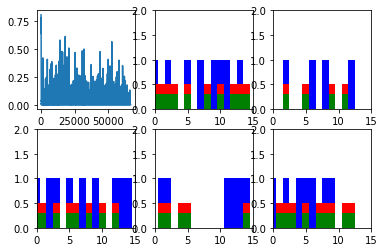

In [35]:
#Step 3 Training the network
with tf.Session() as sess:
    #we stupidly have to do this everytime, it should just know
    #that we initialized these vars. v2 guys, v2..
    sess.run(tf.initialize_all_variables())
    #interactive mode
    plt.ion()
    #initialize the figure
    plt.figure()
    #show the graph
    plt.show()
    #to show the loss decrease
    loss_list = []

    for epoch_idx in range(num_epochs):
        #generate data at eveery epoch, batches run in epochs
        x,y = generateData()
        #initialize an empty hidden state
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)
        #each batch
        for batch_idx in range(num_batches):
            #starting and ending point per batch
            #since weights reoccuer at every layer through time
            #These layers will not be unrolled to the beginning of time, 
            #that would be too computationally expensive, and are therefore truncated 
            #at a limited number of time-steps
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]
            
            #run the computation graph, give it the values
            #we calculated earlier
            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()